# Data Analyst with Python Project

# Visualizing the History of Nobel Prize Winners

## <span style="color:red;"> Project Instructions</span>

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country?

- Store your answers as string variables `top_gender` and `top_country`.

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

- Store this as an integer called `max_decade_usa`.

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

- Store this as a dictionary called `max_female_dict` where the decade is the key and the category is the value. There should only be one key:value pair.

Who was the first woman to receive a Nobel Prize, and in what category?

- Save your string answers as `first_woman_name` and `first_woman_category`.

Which individuals or organizations have won more than one Nobel Prize throughout the years?

- Store the full names in a list named `repeat_list`.

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [4]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Read in the Nobel Prize data
nobel = pd.read_csv(r"C:\Users\wende\Desktop\DataCamp\Data Analyst with Python\9 Visualizing the History of Nobel Prize Winners\workspace\data\nobel.csv")
nobel.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### Part A

What is the most commonly awarded gender and birth country?

- Store your answers as string variables `top_gender` and `top_country`.

In [6]:
#counting the value for "sex column"
nobel["sex"].value_counts()

sex
Male      905
Female     65
Name: count, dtype: int64

In [7]:
#assigning as top_gender

top_gender = nobel["sex"].value_counts().index[0]
top_gender

'Male'

In [8]:
#counting the value for "birth_country column"
nobel["birth_country"].value_counts()

birth_country
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: count, Length: 129, dtype: int64

In [9]:
#assigning as top_country

top_country = nobel["birth_country"].value_counts().index[0]
top_country

'United States of America'

In [10]:
print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


### Part B

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

- Store this as an integer called `max_decade_usa`.

In [22]:
### Creating a new column

nobel["born_in_usa"] = nobel["birth_country"] == "United States of America"

The `numpy.floor` is a mathematical function that returns the floor of the elements of array. The floor of the scalar x is the largest integer i, such that i <= x.

In [29]:
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
nobel['decade']

0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
995    2020
996    2020
997    2020
998    2020
999    2020
Name: decade, Length: 1000, dtype: int32

In [39]:
prop_usa_winners = nobel.groupby('decade', as_index=False)['born_in_usa'].mean()
prop_usa_winners

,decade,born_in_usa
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


**code above means it will groupby decade, appearing as the left column, follow by born in usa(calculated mean)**

In [48]:
# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners["born_in_usa"] == prop_usa_winners['born_in_usa'].max()]["decade"].values[0]
max_decade_usa

2000

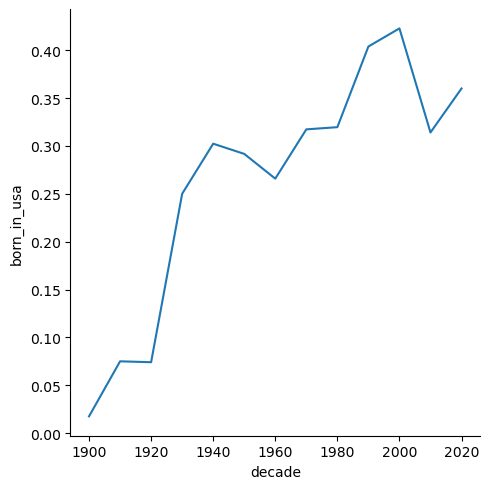

In [126]:
#Plotting born in usa winners

sns.relplot(data=prop_usa_winners,x="decade",y="born_in_usa",kind="line"); #it can be scatter but hard to read so use line instead

### Part C

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

- Store this as a dictionary called `max_female_dict` where the decade is the key and the category is the value. There should only be one key:value pair.

In [64]:
#creating new column nobel_f_w
nobel["nobel_f_w"] = nobel["sex"] == "Female"

In [76]:
prop_f_winners = nobel.groupby(['decade',"category"], as_index=False)['nobel_f_w'].mean()
prop_f_winners

,decade,category,nobel_f_w
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


In [84]:
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_f_winners[prop_f_winners['nobel_f_w'] == prop_f_winners['nobel_f_w'].max()][['decade', 'category']]
max_female_decade_category

,decade,category
68,2020,Literature


##### <span style="color:blue;"> Testing start</span>

**extracting 1 value from a specifc column in a df**

In [124]:
prop_f_winners["category"].values[2]

'Medicine'

In [120]:
#to extract the values from 0
max_female_decade_category["decade"].values[0]

2020

In [122]:
max_female_decade_category["category"].values[0]

'Literature'

##### <span style="color:blue;"> Testing end</span>

In [108]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category["decade"].values[0]:max_female_decade_category["category"].values[0]}
max_female_dict

{2020: 'Literature'}

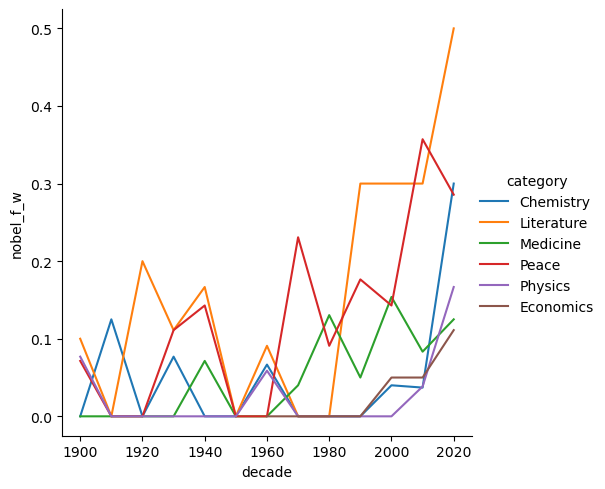

In [132]:
#Plotting female winners with % winners on the y-axis

sns.relplot(data=prop_f_winners,x="decade",y="nobel_f_w",kind="line",hue='category');

### Part D

Who was the first woman to receive a Nobel Prize, and in what category?

- Save your string answers as `first_woman_name` and `first_woman_category`.

In [162]:
#a df consists of only female winners
a= nobel[nobel["nobel_f_w"]]
a.head(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,born_in_usa,decade,nobel_f_w
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,...,Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,False,1900,True


In [180]:
min_year = a[["year","full_name","category"]].sort_values(by="year",ascending=True)
min_year

,year,full_name,category
19,1903,"Marie Curie, née Sklodowska",Physics
29,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace
51,1909,Selma Ottilia Lovisa Lagerlöf,Literature
62,1911,"Marie Curie, née Sklodowska",Chemistry
128,1926,Grazia Deledda,Literature
...,...,...,...
982,2022,Annie Ernaux,Literature
993,2023,Anne L’Huillier,Physics
998,2023,Narges Mohammadi,Peace
989,2023,Katalin Karikó,Medicine


In [184]:
first_woman_name = min_year["full_name"].values[0]
first_woman_name

'Marie Curie, née Sklodowska'

In [188]:
first_woman_category = min_year["category"].values[0]
first_woman_category

'Physics'

In [190]:
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


### Part E

Which individuals or organizations have won more than one Nobel Prize throughout the years?

- Store the full names in a list named `repeat_list`.

In [202]:
#counting names that has more than 1 nobel prize
count_names = nobel["full_name"].value_counts()

In [214]:
#sorting for wins wich are 2-3 nobel prize
repeats = count_names[count_names >=2]
repeats

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: count, dtype: int64

##### <span style="color:blue;"> Testing start</span>

In [228]:
repeats.index

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object', name='full_name')

##### <span style="color:blue;"> Testing end</span>

In [230]:
#listing the index in a list
repeated_name = list(repeats.index)
repeated_name

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

In [236]:
print("\n The repeat winners are :", repeated_name)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


## <span style="color:red;"> DataCamp solution</span>

In [ ]:
# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)

# Calculate the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)